
# Comparación de métodos para convertir significancias en p-valores y prueba combinada de Fisher

Este notebook permite:

- Convertir listas de significancias a p-valores usando distintas distribuciones:
  - Normal estándar
  - t de Student ajustada
  - Gumbel ajustada
  - Distribución mejor ajustada automáticamente
- Calcular el estadístico de Fisher y el p-valor combinado para cada método.
- Realizar una simulación de Monte Carlo para calcular el p-valor empírico de Fisher a partir de p-valores empíricos.

Puedes reemplazar las listas `z_on` y `z_off` por tus datos reales.

## Requisitos

Este notebook requiere las siguientes librerías:
```bash
pip install numpy scipy pandas matplotlib
```


In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, gumbel_r, chi2, kstest


In [13]:
source_on=[0.27652459081559916, 1.1802728757073235, -1.119599012783303, -1.9960433641517563, 0.40100275333575064, -2.9161624719406802, 1.6099999999999999, 2.3100000000000014, 0.65, 0.0, 0.5799999999999998, 1.5800000000000007, 0.0, 2.549999999999998, 2.2200000000000015, 0.66, 2.7200000000000046, 1.0499999999999998, 1.0499999999999998, 1.4399999999999997, 2.0599999999999996, 0.2700000000000002, 1.0599999999999998, 0.38000000000000006, 0.8999999999999999, 1.9300000000000006, 0.0, 0.52, 1.7499999999999996, 1.0999999999999999, 0.059999999999999984, 2.8700000000000054, 0.2700000000000002, 0.0, 1.0099999999999996, 0.8300000000000002, 1.6000000000000003, 0.2700000000000002, 0.7100000000000001, 0.0, 0.84, 0.36999999999999994, 0.09333357287547434, 1.4797347826972556, 0.9848906128231127, 0.5058460775322822, 1.1032209558140882, 0.615972362625652, 2.3420162866669525, 0.983843138577162, -0.011783580173950953, 1.8499999999999994, 0.6000000000000001, 1.0, 0.2700000000000002, 2.8999999999999986, 0.98, 0.0, 2.21, 0.7799999999999999, 1.12, 2.1900000000000017, 2.9700000000000033, 0.7400000000000003, 2.0599999999999996, 1.0200000000000002, 1.92, 1.2200000000000002, 1.2300000000000006, 0.9200000000000002, 0.0, 0.9300000000000003, 2.02, 2.1799999999999997, 1.7700000000000005, 3.4499999999999553, 0.0, 2.200000000000001, 1.2200000000000002, 0.0, 1.2499999999999993, 1.2599999999999998, 2.479999999999997, 2.5099999999999976, 1.9500000000000006, 0.55, 1.2200000000000002, 0.0, 1.3000000000000003, 1.3400000000000007]
source_off=[0.3762053278917501, 0.5420599746632863, 0.33019448736380297, 0.9408828013415984, 0.39249240998376766, 0.8299271551913422, 0.5, 0.0026354020779049137, 0.3631693488243809, 0.05261613845425206, 0.26108629969286157, 0.5, 0.15150500278834367, 0.054799291699557995, 0.4522415739794161, 0.026189844940452733, 0.5, 0.5, 0.1292381122400179, 0.5, 0.02275013194817921, 0.17878637961437172, 0.15150500278834367, 0.08075665923377107, 0.007760253550553653, 0.5, 0.4090458848579941, 0.1867329430371727, 0.16602324606352958, 0.015777607391090465, 0.19766254312269238, 0.5, 0.20326939182806836, 0.07493369953432705, 0.11123243744783462, 0.01742917793765708, 0.03593031911292577, 0.06943662333333167, 0.5, 0.46414360741482785, 0.01700302264763276, 0.10564977366685535, 0.11702319602310873, 0.36692826396397193, 0.1292381122400179, 0.5, 0.036726955698726305, 0.12714315056279824, 0.5, 0.29805596539487644, 0.5, 0.1736087803386246, 0.2809573088985644, 0.06552171208891644, 0.09012267246445238, 0.5, 0.20897008787160165, 0.3409029737723226, 0.20610805358581308, 0.12302440305134343, 0.1814112548917972, 0.4090458848579941, 0.1635430593276923, 0.5, 0.0351478935840388, 0.07926984145339233, 0.007142810735271454, 0.5, 0.0027179449227012764, 0.5, 0.0002157733992946831, 0.11123243744783462, 0.4090458848579941, 0.043632936524031884, 0.048457226266722775, 0.5, 0.19766254312269238, 0.050502583474103746, 0.054799291699557995, 0.4051651283022042, 0.15624764502125466, 0.24509709367430943, 0.05937994059479301, 0.17618554224525784, 0.8541838700529854, 0.13941376474909528, 0.3811371565028304, 0.5516603082928957, 0.2291085235656768, 0.9320401129826985, 0.36196788362154375, 0.998228170429232, 0.9246527950103394, 0.009903075559164254, 0.16852760746683781, 0.024419185280222577, 0.20610805358581308, 0.5, 0.5, 0.41293557735178543, 0.5, 0.5, 0.0067556526071406164, 0.03753798034851674, 0.010170438668719695, 0.5, 0.26108629969286157, 0.22662735237686826, 0.5, 0.5, 0.08534345082196704, 0.0036811080091749826, 0.3556912451994533, 0.08850799143740196, 0.17105612630848177, 0.1867329430371727, 0.4051651283022042, 0.16852760746683781, 0.4012936743170763, 0.3782804781779807, 0.3631693488243809, 0.009137467530572652, 0.3409029737723226, 0.2296499971647905, 0.0034669738030406183, 0.5, 0.5, 0.01390344751349859, 0.5, 0.01617738337216612, 0.3631693488243809, 0.36692826396397193, 0.012545461435946592, 0.004798796597126231, 0.4800611941616275, 0.03753798034851674, 0.5, 0.4800611941616275, 0.5, 0.2514288950953101, 0.04745968180294735, 0.1867329430371727, 0.10383468112130045, 0.3594235667820087, 0.3594235667820087, 0.013552581146419995, 0.03362496941962834, 0.044565462758543006, 0.12100048442101818, 0.5, 0.22064994634264967, 0.027428949703836802, 0.05591740251946942, 0.06680720126885809, 0.11900010745520073, 0.050502583474103746, 0.5, 0.08226443867766897, 0.21185539858339664, 0.10027256795444206, 0.0014889987452374465, 0.5, 0.08075665923377107, 0.4090458848579941, 0.1867329430371727, 0.3631693488243809, 0.2388520680899867, 0.06178017671181191, 0.03593031911292577, 0.1948945212518084, 0.008656319025516557, 0.3050257308975194, 0.5, 0.09509791779523902, 0.03593031911292577, 0.38973875244420275, 0.05261613845425206, 0.15865525393145707, 0.05369892814811972, 0.5, 0.47607781734589316]
z_on = np.array(source_on)
z_off = np.array(source_off)


In [ ]:

def fit_and_get_pvals(z, dist):
    params = dist.fit(z)
    pvals = 1 - dist.cdf(z, *params)
    return pvals, params
pvals_norm = 1 - norm.cdf(z_on)

# Ajuste t-student
pvals_t, params_t = fit_and_get_pvals(z_on, t)

# Ajuste Gumbel
pvals_gumbel, params_gumbel = fit_and_get_pvals(z_on, gumbel_r)

# Mejor distribución ajustada (según KS)
dists = {"norm": norm, "t": t, "gumbel": gumbel_r}
ks = {name: kstest(z_on, dist.cdf, args=dist.fit(z_on)).statistic for name, dist in dists.items()}
best_name = min(ks, key=ks.get)
best_dist = dists[best_name]
pvals_best, params_best = fit_and_get_pvals(z_on, best_dist)


array([3.91072587e-01, 1.18945851e-01, 8.68557662e-01, 9.77035399e-01,
       3.44209048e-01, 9.98228170e-01, 5.36989281e-02, 1.04440771e-02,
       2.57846111e-01, 5.00000000e-01, 2.80957309e-01, 5.70534332e-02,
       5.00000000e-01, 5.38614595e-03, 1.32093838e-02, 2.54626915e-01,
       3.26409582e-03, 1.46859056e-01, 1.46859056e-01, 7.49336995e-02,
       1.96992704e-02, 3.93580127e-01, 1.44572300e-01, 3.51972708e-01,
       1.84060125e-01, 2.68034189e-02, 5.00000000e-01, 3.01531788e-01,
       4.00591569e-02, 1.35666061e-01, 4.76077817e-01, 2.05235899e-03,
       3.93580127e-01, 5.00000000e-01, 1.56247645e-01, 2.03269392e-01,
       5.47992917e-02, 3.93580127e-01, 2.38852068e-01, 5.00000000e-01,
       2.00454193e-01, 3.55691245e-01, 4.62819281e-01, 6.94720196e-02,
       1.62338902e-01, 3.06482354e-01, 1.34965612e-01, 2.68956380e-01,
       9.58993897e-03, 1.62596323e-01, 5.04700860e-01, 3.21567748e-02,
       2.74253118e-01, 1.58655254e-01, 3.93580127e-01, 1.86581330e-03,
      

In [ ]:

def fisher_stat(pvals):
    chi2_val = -2 * np.sum(np.log(pvals))
    p_comb = 1 - chi2.cdf(chi2_val, 2 * len(pvals))
    sigma = norm.isf(p_comb)
    return chi2_val, p_comb, sigma

resultados = {
    "Normal estándar": fisher_stat(pvals_norm),
    "t-Student ajustada": fisher_stat(pvals_t),
    "Gumbel ajustada": fisher_stat(pvals_gumbel),
    f"Mejor ajustada ({best_name})": fisher_stat(pvals_best)
}

df_resultados = pd.DataFrame(resultados, index=["Chi²", "p_comb", "Significancia (σ)"]).T
df_resultados


,Chi²,p_comb,Significancia (σ)
Normal estándar,416.730837,0.000000,inf
t-Student ajustada,178.865643,0.509872,-0.024748
Gumbel ajustada,147.412291,0.963912,-1.798010
Mejor ajustada (t),178.865643,0.509872,-0.024748


/tmp/ipykernel_720600/3886727938.py:6: RuntimeWarning: divide by zero encountered in log
  chi_obs = -2 * np.sum(np.log(p_emp))


Chi² observado: inf
p_empírico total: 0.0000
Significancia empírica (σ): inf


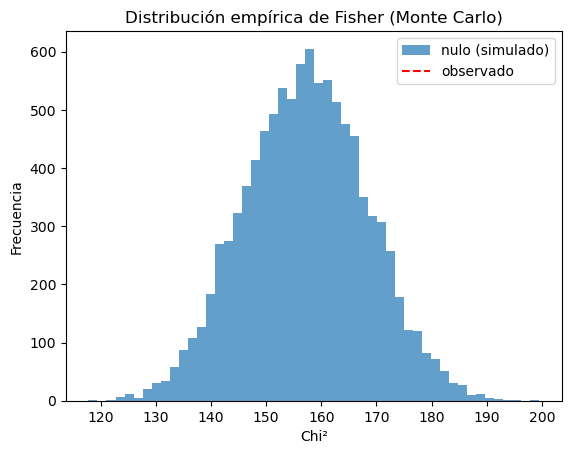

In [ ]:

def empirical_p(z, background):
    N = len(background)
    return np.array([np.sum(background >= zi) for zi in z]) / N

p_emp = empirical_p(z_on, z_off)
chi_obs = -2 * np.sum(np.log(p_emp))

# Simulación
n_reps = 10000
chi_null = np.zeros(n_reps)
for i in range(n_reps):
    muestra = np.random.choice(z_off, size=len(z_on), replace=False)
    p_muestra = empirical_p(muestra, z_off)
    chi_null[i] = -2 * np.sum(np.log(p_muestra))

p_emp_total = np.mean(chi_null >= chi_obs)
sig_emp_total = norm.isf(p_emp_total)

print(f"Chi² observado: {chi_obs:.2f}")
print(f"p_empírico total: {p_emp_total:.4f}")
print(f"Significancia empírica (σ): {sig_emp_total:.2f}")

plt.hist(chi_null, bins=50, alpha=0.7, label="nulo (simulado)")
plt.axvline(chi_obs, color="red", linestyle="--", label="observado")
plt.legend()
plt.xlabel("Chi²")
plt.ylabel("Frecuencia")
plt.title("Distribución empírica de Fisher (Monte Carlo)")
plt.show()
